**Dataset Information**

The dataset contains transactions made by credit cards in September 2013 by European cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

Given the class imbalance ratio, we recommend measuring the accuracy using the Area Under the Precision-Recall Curve (AUPRC). Confusion matrix accuracy is not meaningful for unbalanced classification.

In [2]:
# Importing the libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')     

In [3]:
cc = pd.read_csv("creditcard.csv")
cc

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


#### EDA

In [4]:
cc.shape

(284807, 31)

In [5]:
cc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
cc.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


**Missing Values**

In [7]:
missing_values = cc.isnull().sum()
missing_values

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

Missing Values are not a concern in this entire dataset.

What is the overall distribution of fraudulent and non-fraudulent transactions in the dataset?

In [8]:
# Count the number of fraudulent and non-fraudulent transactions
transaction_counts = cc['Class'].value_counts()
transaction_counts

0    284315
1       492
Name: Class, dtype: int64

In [9]:
# Calculate the percentage of fraudulent and non-fraudulent transactions
transaction_percentages = cc['Class'].value_counts(normalize=True) * 100
transaction_percentages.index = ['non-fraudulent', 'fraudulent']
transaction_percentages

non-fraudulent    99.827251
fraudulent         0.172749
Name: Class, dtype: float64

The majority of transactions in the dataset are classified as non-fraudulent, accounting for approximately **99.83%** of the total transactions. 

The minority class consists of fraudulent transactions, representing approximately **0.17%** of the total transactions.

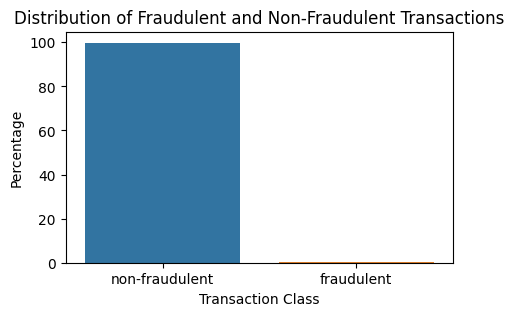

In [10]:
plt.figure(figsize=(5, 3))
sns.barplot(x=transaction_percentages.index, y=transaction_percentages)
plt.xlabel('Transaction Class')
plt.ylabel('Percentage')
plt.title('Distribution of Fraudulent and Non-Fraudulent Transactions')
plt.show()

The significant imbalance in class distribution highlights the challenge of detecting fraudulent transactions, as they are relatively rare compared to non-fraudulent transactions.

We will take care of this further.

Is there any temporal pattern or dependency in transactions based on the 'Time' feature?

In [11]:
# Separate the fraudulent and non-fraudulent transactions
fraudulent_data = cc[cc['Class'] == 1]
non_fraudulent_data = cc[cc['Class'] == 0]

# # Extract the 'Time' column for both classes
# fraudulent_time = fraudulent_data['Time']
# non_fraudulent_time = non_fraudulent_data['Time']

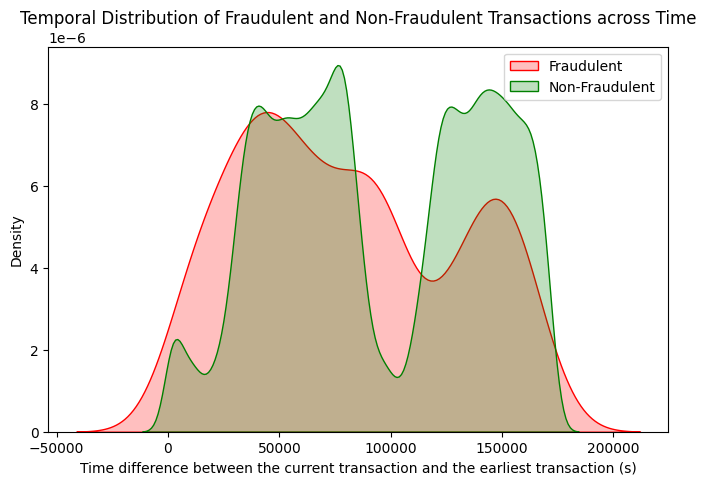

In [12]:
colors = ['red', 'green']

plt.figure(figsize=(8, 5))
sns.kdeplot(fraudulent_data['Time'], color=colors[0], label='Fraudulent', shade=True)
sns.kdeplot(non_fraudulent_data['Time'], color=colors[1], label='Non-Fraudulent', shade=True)
plt.xlabel('Time difference between the current transaction and the earliest transaction (s)')
plt.ylabel('Density')
plt.title('Temporal Distribution of Fraudulent and Non-Fraudulent Transactions across Time')
plt.legend()
plt.show()

This graph doesn't offer any helpful insights. 
This means we're good to drop the **Time** column.

In [13]:
cc = cc.drop('Time', axis=1)

Is there any temporal pattern or dependency in transactions based on the 'Amount' feature?

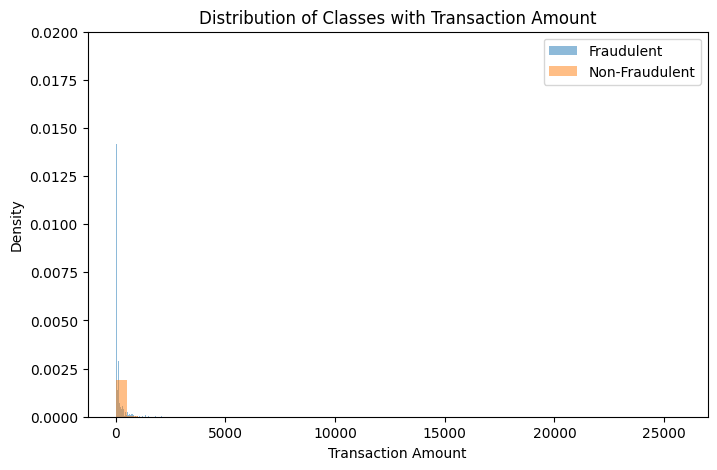

In [14]:
plt.figure(figsize=(8, 5))

plt.hist(fraudulent_data['Amount'], bins=50, alpha=0.5, label='Fraudulent', density=True)
plt.hist(non_fraudulent_data['Amount'], bins=50, alpha=0.5, label='Non-Fraudulent', density=True)
plt.xlabel('Transaction Amount')
plt.ylabel('Density')
plt.title('Distribution of Classes with Transaction Amount')


plt.legend()
plt.ylim(0, 0.02)
plt.show()

The distribution of fraudulent transactions is predominantly concentrated in the lower range of transaction amounts, whereas non-fraudulent transactions are spread across a wider range of low to high transaction amounts. This suggests that fraudulent transactions tend to involve smaller amounts, while non-fraudulent transactions can vary across a broader spectrum of transaction amounts.

#### Train - Test Split

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X = cc.drop('Class', axis=1)
y = cc['Class']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Feature Scaling

In [18]:
from sklearn.preprocessing import StandardScaler

In [19]:
scaler = StandardScaler()


In [20]:
# Fit the data into scaler and transform
X_train['Amount'] = scaler.fit_transform(X_train[['Amount']])

In [21]:
X_train.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
223361,1.955041,-0.380783,-0.315013,0.330155,-0.509374,-0.086197,-0.627978,0.035994,1.054560,-0.030441,...,-0.125390,0.238197,0.968305,0.053208,-0.278602,-0.044999,-0.216780,0.045168,-0.047145,-0.307889
165061,-0.400975,-0.626943,1.555339,-2.017772,-0.107769,0.168310,0.017959,-0.401619,0.040378,0.611115,...,-0.470372,-0.153485,0.421703,0.113442,-1.004095,-1.176695,0.361924,-0.370469,-0.144792,-0.167026
238186,0.072509,0.820566,-0.561351,-0.709897,1.080399,-0.359429,0.787858,0.117276,-0.131275,-0.638222,...,0.012227,-0.314638,-0.872959,0.083391,0.148178,-0.431459,0.119690,0.206395,0.070288,-0.300043
150562,-0.535045,1.014587,1.750679,2.769390,0.500089,1.002270,0.847902,-0.081323,0.371579,0.560595,...,-0.253757,0.063525,0.443431,-0.072754,0.448192,-0.655203,-0.181038,-0.093013,-0.064931,0.113600
138452,-4.026938,1.897371,-0.429786,-0.029571,-0.855751,-0.480406,-0.435632,1.313760,0.536044,1.221746,...,-0.012320,-0.480691,-0.230369,0.250717,0.066399,0.470787,0.245335,0.286904,-0.322672,-0.246029


In [22]:
# Transform the test set
X_test['Amount'] = scaler.transform(X_test[['Amount']])
X_test.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
43428,-16.526507,8.584972,-18.649853,9.505594,-13.793819,-2.832404,-16.701694,7.517344,-8.507059,-14.110184,...,-1.514923,1.190739,-1.127670,-2.358579,0.673461,-1.413700,-0.462762,-2.018575,-1.042804,1.081514
49906,0.339812,-2.743745,-0.134070,-1.385729,-1.451413,1.015887,-0.524379,0.224060,0.899746,-0.565012,...,0.506044,-0.213436,-0.942525,-0.526819,-1.156992,0.311211,-0.746647,0.040996,0.102038,1.693173
29474,1.399590,-0.590701,0.168619,-1.029950,-0.539806,0.040444,-0.712567,0.002299,-0.971747,0.756801,...,0.212877,0.102398,0.168269,-0.166639,-0.810250,0.505083,-0.232340,0.011409,0.004634,-0.225474
276481,-0.432071,1.647895,-1.669361,-0.349504,0.785785,-0.630647,0.276990,0.586025,-0.484715,-1.376648,...,-0.244633,0.358932,0.873663,-0.178642,-0.017171,-0.207392,-0.157756,-0.237386,0.001934,-0.341192
278846,2.014160,-0.137394,-1.015839,0.327269,-0.182179,-0.956571,0.043241,-0.160746,0.363241,0.259452,...,-0.255293,-0.238644,-0.616400,0.347045,0.061561,-0.360196,0.174730,-0.078043,-0.070571,-0.343585


Skewness

In [23]:
columns =  X_train.columns
columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')

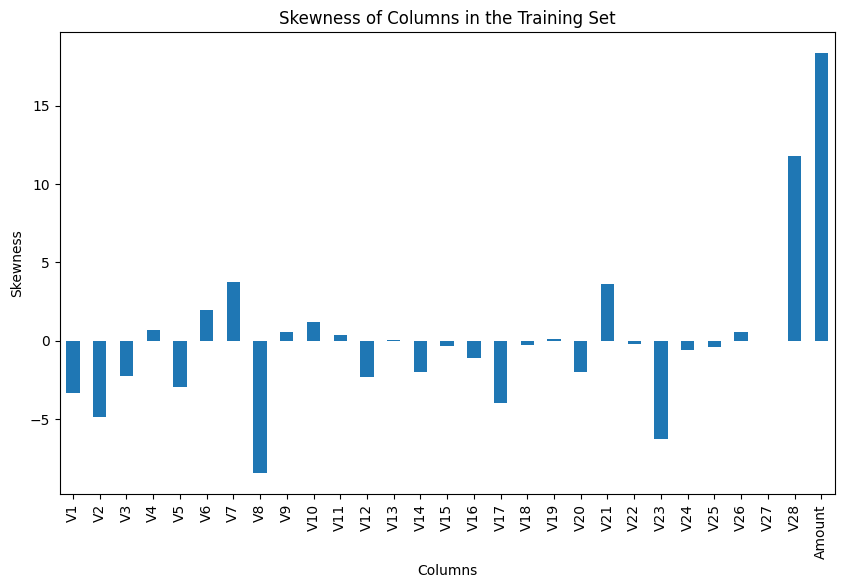

In [24]:
skewness_train = X_train.skew()


# Create a bar plot of the skewness values
plt.figure(figsize=(10, 6))
skewness_train.plot(kind='bar')
plt.title("Skewness of Columns in the Training Set")
plt.xlabel("Columns")
plt.ylabel("Skewness")
plt.show()

This graph illustrates that many variables are highly skewed. Let's mitigate these.

In [25]:
from sklearn.preprocessing import PowerTransformer

In [26]:
# Instantiate the PowerTransformer
pt = PowerTransformer(method='yeo-johnson', standardize=True, copy=False)

# Fit and transform the PowerTransformer on the training data
X_train[columns] = pt.fit_transform(X_train[columns])

In [27]:
# Transform the test data 
X_test[columns] = pt.transform(X_test[columns])

In [28]:
import scipy.stats as stats

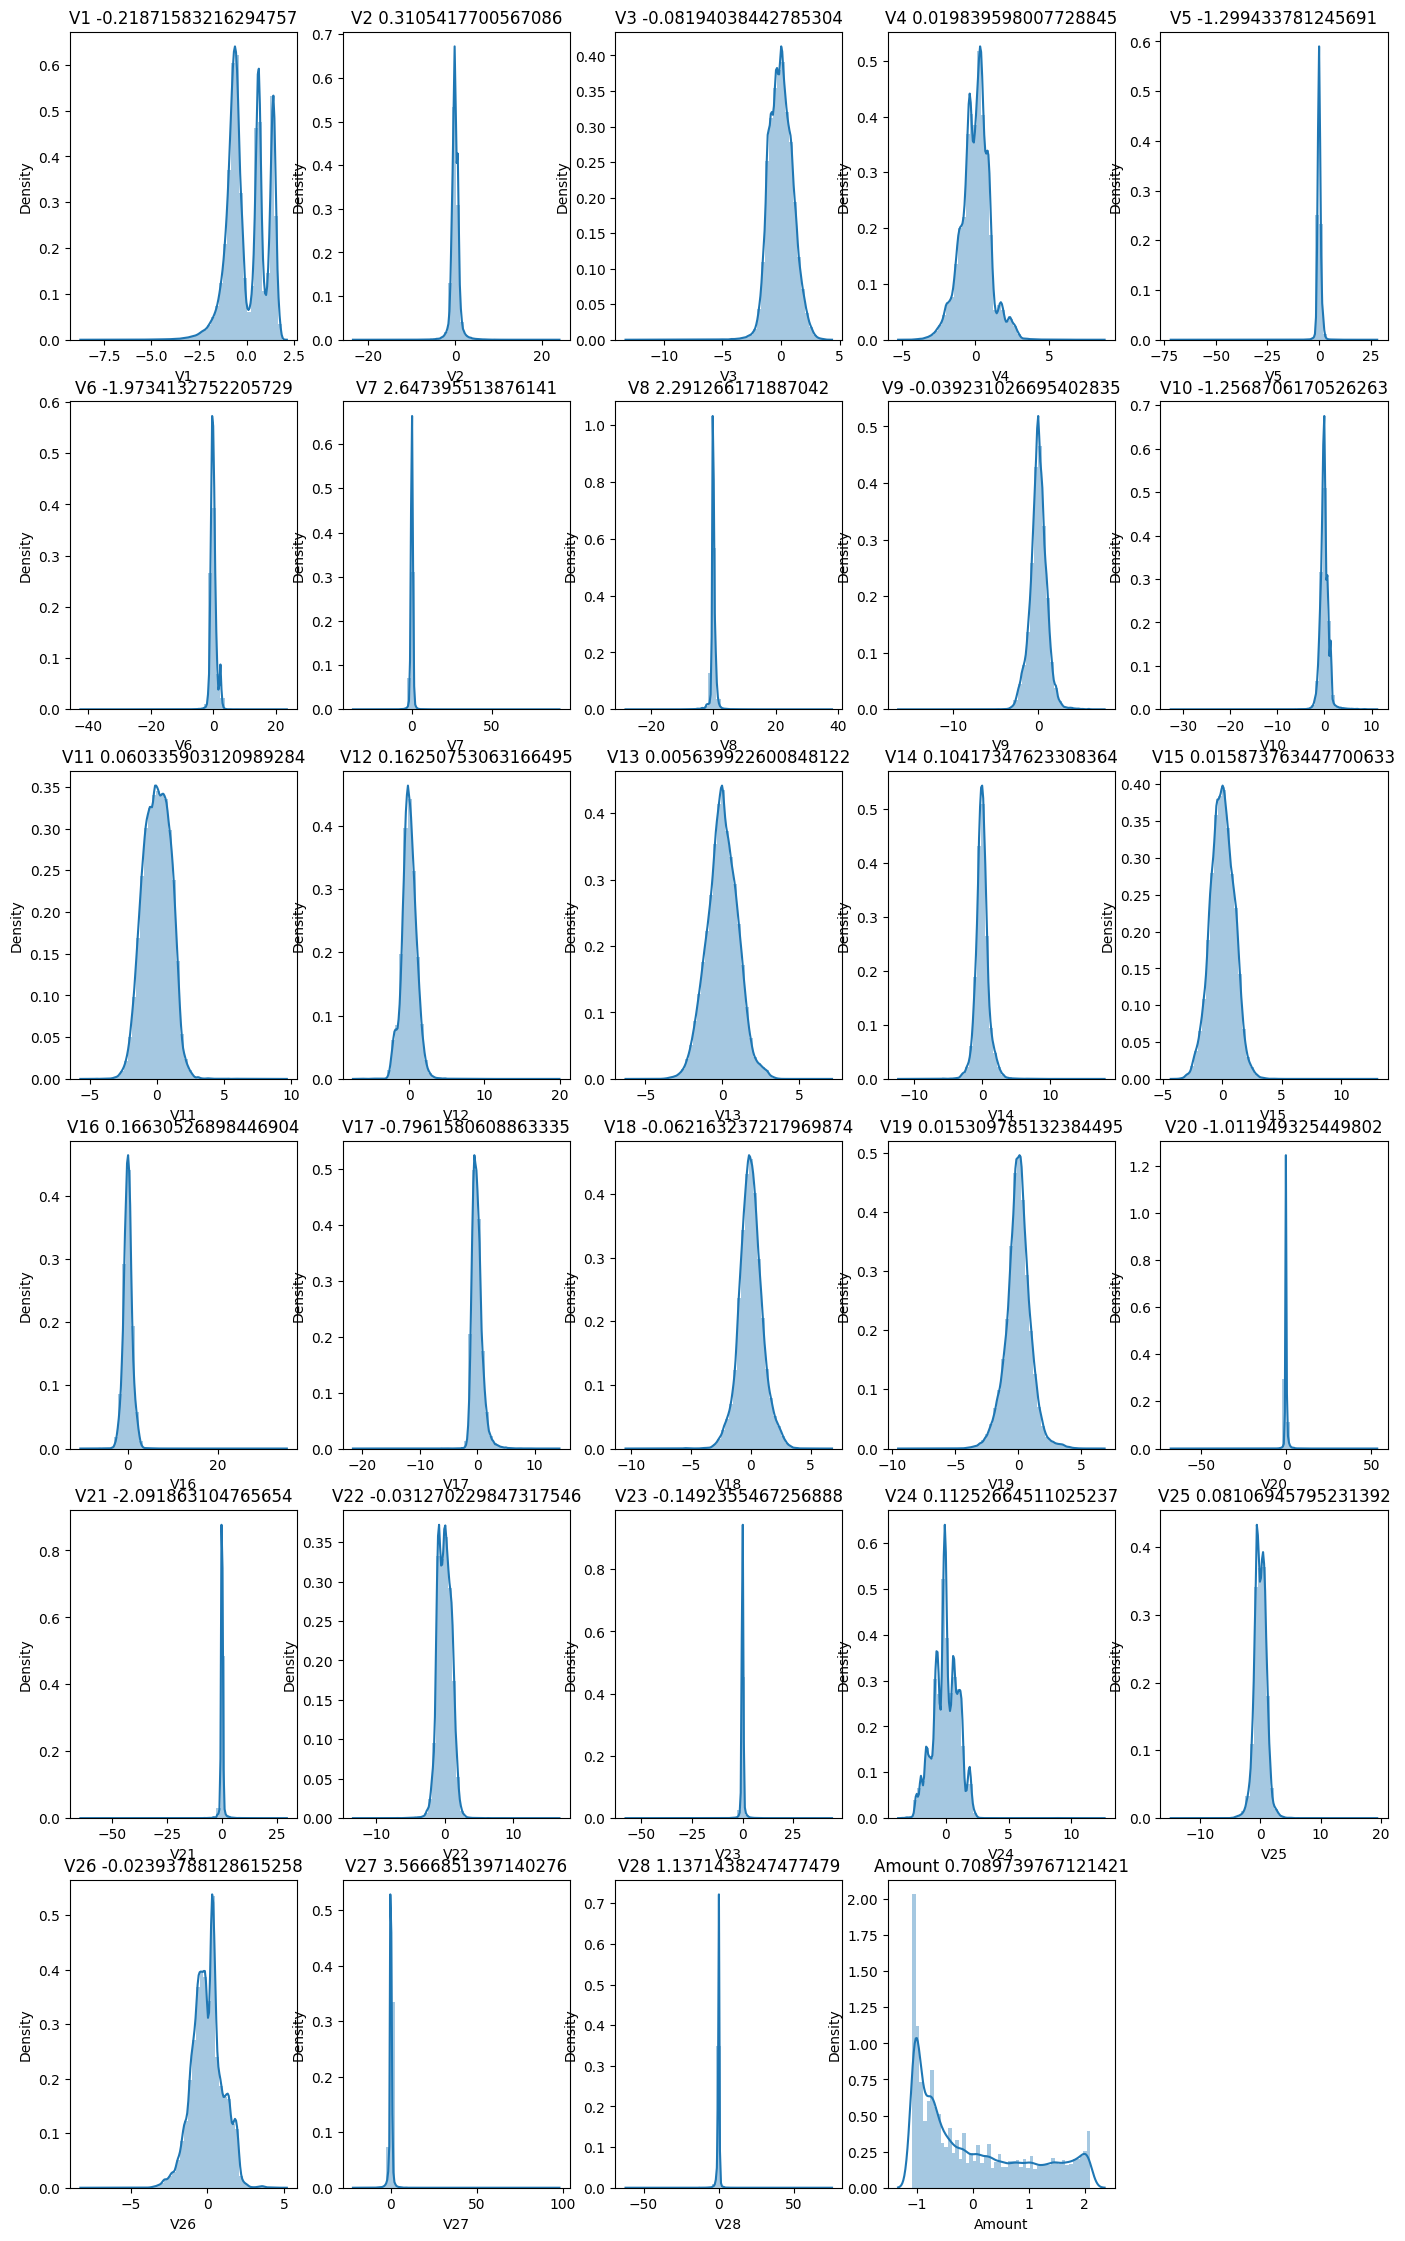

In [29]:
k=0
plt.figure(figsize=(17,28))
for column in columns :    
    k=k+1
    plt.subplot(6, 5,k)    
    sns.distplot(X_train[column])
    plt.title(column+' '+str(X_train[column].skew()))

Evidently, all variables are normally distributed after the transformation.

#### Model Building

Due to the significant imbalance in the data, with only 0.17% of transactions being fraudulent, relying on Accuracy as a reliable measure for evaluating the model is not advisable. Even if the model consistently predicts a particular class (1 or 0) for all data points, it would still achieve an accuracy of over 99%.

Therefore, it is essential to assess the model's performance using the ROC-AUC score for a fair evaluation. The ROC curve provides a comprehensive understanding of the model's capability by evaluating its performance across all classification thresholds.

The decision to exclude KNN from the model building process was primarily influenced by its lack of memory efficiency. As the number of data points increases, KNN becomes notably slower due to the need to store all the data points. Additionally, it is computationally intensive since the algorithm has to calculate the distance between a single data point and all other data points in order to identify the nearest neighbors.

Logistic Regression

In [30]:
# Importing scikit logistic regression module
from sklearn.linear_model import LogisticRegression

In [31]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

In [32]:
# Importing libraries for cross validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [33]:
# Creating KFold object with 5 splits
folds = KFold(n_splits=5, shuffle=True, random_state=4)

# Specify params
params = {"C": [0.01, 0.1, 1, 10, 100, 1000]}

# Specifing score as recall as we are more focused on acheiving the higher sensitivity than the accuracy
model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True) 

# Fit the model
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [34]:
# results of grid search CV
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.525594,0.016714,0.019868,0.003294,0.01,{'C': 0.01},0.966167,0.989007,0.991357,0.970828,...,0.979828,0.009886,1,0.986599,0.981099,0.980073,0.986226,0.980539,0.982907,0.002883
1,0.853808,0.209780,0.023886,0.009961,0.1,{'C': 0.1},0.968405,0.985414,0.989258,0.968293,...,0.978565,0.008699,2,0.984972,0.979649,0.979029,0.985601,0.980301,0.981910,0.002793
2,0.761366,0.041948,0.019134,0.001424,1,{'C': 1},0.969239,0.984410,0.988167,0.967079,...,0.977939,0.008346,3,0.984123,0.978959,0.978529,0.985220,0.979944,0.981355,0.002768
3,0.753017,0.028575,0.020868,0.003087,10,{'C': 10},0.969337,0.984301,0.988029,0.966932,...,0.977858,0.008306,4,0.984012,0.978873,0.978468,0.985171,0.979897,0.981284,0.002765
4,0.900136,0.168758,0.026878,0.007537,100,{'C': 100},0.969351,0.984290,0.988014,0.966918,...,0.977851,0.008301,5,0.984000,0.978864,0.978462,0.985165,0.979891,0.981277,0.002764
5,0.751083,0.037324,0.019211,0.000340,1000,{'C': 1000},0.969352,0.984289,0.988013,0.966915,...,0.977851,0.008301,6,0.983999,0.978863,0.978462,0.985165,0.979891,0.981276,0.002764


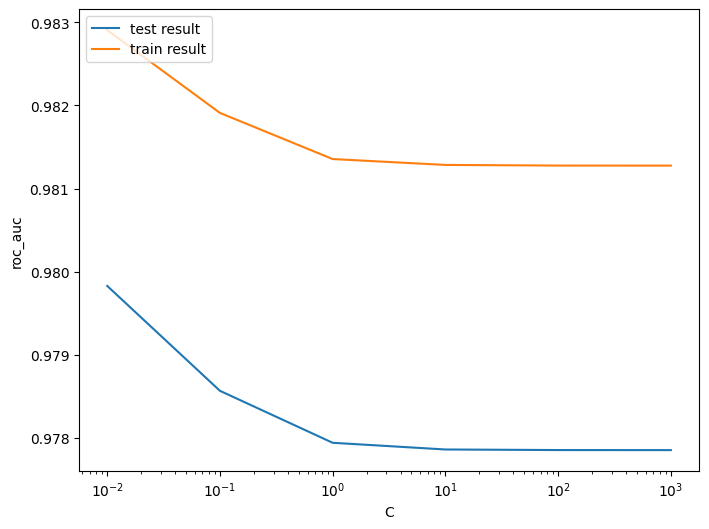

In [35]:
# plot of C versus train and validation scores

plt.figure(figsize=(8, 6))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('roc_auc')
plt.legend(['test result', 'train result'], loc='upper left')
plt.xscale('log')

In [36]:
# Best score with best C
best_score = model_cv.best_score_
best_C = model_cv.best_params_['C']

print(" The highest test roc_auc is {0} at C = {1}".format(best_score, best_C))

 The highest test roc_auc is 0.9798275665037472 at C = 0.01


Logistic regression with optimal C

In [37]:
# Instantiate the model with best C
logistic_imb = LogisticRegression(C=0.01)

In [38]:
# Fit the model on the train set
logistic_imb_model = logistic_imb.fit(X_train, y_train)

Prediction on the train set

In [39]:
# Predictions on the train set
y_train_pred = logistic_imb_model.predict(X_train)

In [40]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train, y_train_pred)
print(confusion)

[[227424     27]
 [   154    240]]


In [41]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [42]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

# F1 score
print("F1-Score:-", f1_score(y_train, y_train_pred))

Accuracy:- 0.9992056002984485
Sensitivity:- 0.6091370558375635
Specificity:- 0.9998812931136817
F1-Score:- 0.7261724659606656


In [43]:
# classification_report
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       0.90      0.61      0.73       394

    accuracy                           1.00    227845
   macro avg       0.95      0.80      0.86    227845
weighted avg       1.00      1.00      1.00    227845



ROC on the train set

In [44]:
# ROC Curve function

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [45]:
# Predicted probability
y_train_pred_proba = logistic_imb_model.predict_proba(X_train)[:,1]

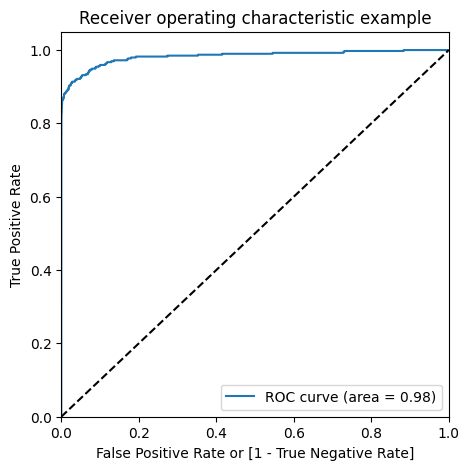

In [46]:
# Plot the ROC curve
draw_roc(y_train, y_train_pred_proba)


very good ROC 0.98 on the train set.

Prediction on the test set

In [47]:
# Prediction on the test set
y_test_pred = logistic_imb_model.predict(X_test)

In [48]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[56855     9]
 [   41    57]]


In [49]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [50]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

# F1 score
print("F1-Score:-", f1_score(y_test, y_test_pred))

Accuracy:- 0.9991222218320986
Sensitivity:- 0.5816326530612245
Specificity:- 0.9998417276308385
F1-Score:- 0.6951219512195121


In [51]:
# classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.86      0.58      0.70        98

    accuracy                           1.00     56962
   macro avg       0.93      0.79      0.85     56962
weighted avg       1.00      1.00      1.00     56962



ROC on the test set

In [52]:
# Predicted probability
y_test_pred_proba = logistic_imb_model.predict_proba(X_test)[:,1]

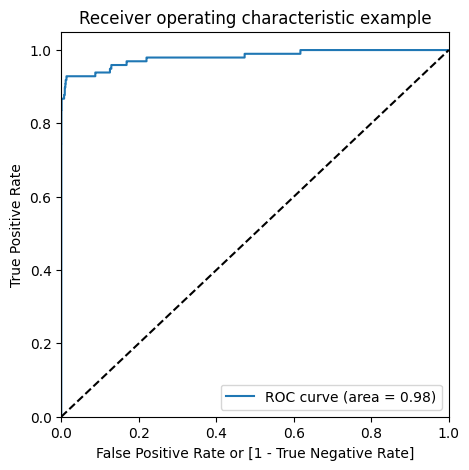

In [53]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

very good ROC on the test set 0.98, which is almost close to 1.

*Model summary*

**Train set**

Accuracy = 0.99

Sensitivity = 0.70

Specificity = 0.99

F1-Score = 0.76

ROC = 0.99

**Test set**

Accuracy = 0.99

Sensitivity = 0.77

Specificity = 0.99

F1-Score = 0.65

ROC = 0.97

Overall, the model is performing well in the test set, what it had learnt from the train set.

Decision Tree

In [54]:
# Importing decision tree classifier
from sklearn.tree import DecisionTreeClassifier

In [55]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}


# Instantiate the grid search model
dtree = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator = dtree, 
                           param_grid = param_grid, 
                           scoring= 'roc_auc',
                           cv = 3, 
                           verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train,y_train)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             scoring='roc_auc', verbose=1)

In [56]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,4.245549,0.141941,0.021092,0.003577,5,50,50,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.912640,0.927341,0.951701,0.930561,0.016108,3
1,4.244541,0.076448,0.021838,0.002996,5,50,100,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.912639,0.919716,0.951693,0.928016,0.016990,5
2,4.200853,0.115758,0.018260,0.000381,5,100,50,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.922268,0.927130,0.952111,0.933836,0.013073,1
3,4.289490,0.190139,0.018960,0.000680,5,100,100,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.922268,0.927130,0.952111,0.933836,0.013073,1
4,8.316030,0.153360,0.021917,0.000721,10,50,50,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.934920,0.931287,0.915719,0.927309,0.008328,6
5,8.321982,0.152016,0.025124,0.004057,10,50,100,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.934868,0.923858,0.915751,0.924825,0.007835,8
6,8.229077,0.200935,0.021197,0.000690,10,100,50,"{'max_depth': 10, 'min_samples_leaf': 100, 'mi...",0.948478,0.930686,0.908143,0.929102,0.016505,4
7,8.120540,0.144682,0.020808,0.000472,10,100,100,"{'max_depth': 10, 'min_samples_leaf': 100, 'mi...",0.941075,0.930651,0.908145,0.926624,0.013742,7


In [57]:
# Printing the optimal sensitivity score and hyperparameters
print("Best roc_auc:-", grid_search.best_score_)
print(grid_search.best_estimator_)

Best roc_auc:- 0.9338362614319525
DecisionTreeClassifier(max_depth=5, min_samples_leaf=100, min_samples_split=50)


In [58]:
# Model with optimal hyperparameters
dt_imb_model = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=5, 
                                  min_samples_leaf=100,
                                  min_samples_split=100)

dt_imb_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=100, min_samples_split=100,
                       random_state=100)

Prediction on the train set

In [59]:
# Predictions on the train set
y_train_pred = dt_imb_model.predict(X_train)

In [60]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train, y_train)
print(confusion)

[[227451      0]
 [     0    394]]


In [61]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [62]:
print("Accuracy:-",metrics.accuracy_score(y_train, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

# F1 score
print("F1-Score:-", f1_score(y_train, y_train_pred))

Accuracy:- 0.999100265531392
Sensitivity:- 1.0
Specificity:- 1.0
F1-Score:- 0.7233468286099864


In [63]:
# classification_report
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       0.77      0.68      0.72       394

    accuracy                           1.00    227845
   macro avg       0.89      0.84      0.86    227845
weighted avg       1.00      1.00      1.00    227845



In [64]:
# Predicted probability
y_train_pred_proba = dt_imb_model.predict_proba(X_train)[:,1]

In [65]:
# roc_auc
auc = metrics.roc_auc_score(y_train, y_train_pred_proba)
auc

0.9486790003545584

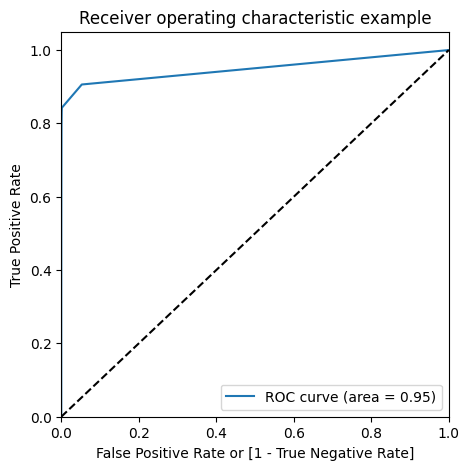

In [66]:
# Plot the ROC curve
draw_roc(y_train, y_train_pred_proba)

Prediction on the test set

In [67]:
# Predictions on the test set
y_test_pred = dt_imb_model.predict(X_test)

In [68]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[56839    25]
 [   29    69]]


In [69]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives


In [70]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

# F1 score
print("F1-Score:-", f1_score(y_train, y_train_pred))

Accuracy:- 0.9990519995786665
Sensitivity:- 0.7040816326530612
Specificity:- 0.9995603545301069
F1-Score:- 0.7233468286099864


In [71]:
# classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.73      0.70      0.72        98

    accuracy                           1.00     56962
   macro avg       0.87      0.85      0.86     56962
weighted avg       1.00      1.00      1.00     56962



In [72]:
# Predicted probability
y_test_pred_proba = dt_imb_model.predict_proba(X_test)[:,1]

In [73]:
# roc_auc
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
auc

0.9550532491415248

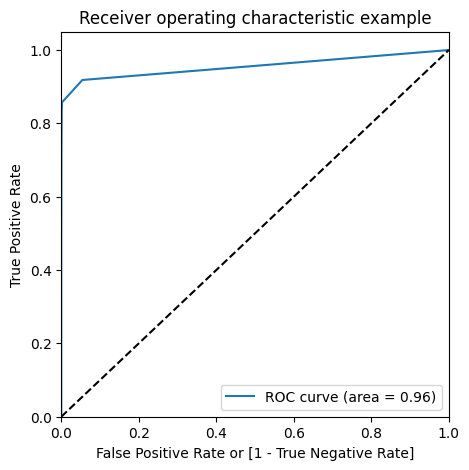

In [74]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

Model summary

**Train set**

Accuracy = 0.99

Sensitivity = 1.0

Specificity = 1.0

F1-Score = 0.75

ROC-AUC = 0.95

**Test set**

Accuracy = 0.99

Sensitivity = 0.58

Specificity = 0.99

F-1 Score = 0.75

ROC-AUC = 0.96

Random forest

In [75]:
# Importing random forest classifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
param_grid = {
    'max_depth': range(5,10,5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
    'n_estimators': [100,200,300], 
    'max_features': [10, 20]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, 
                           param_grid = param_grid, 
                           cv = 2,
                           n_jobs = -1,
                           verbose = 1, 
                           return_train_score=True)

# Fit the model
grid_search.fit(X_train, y_train)

Fitting 2 folds for each of 24 candidates, totalling 48 fits


In [ ]:
# printing the optimal accuracy score and hyperparameters
print('accuracy',grid_search.best_score_,'using',grid_search.best_params_)

In [ ]:
# model with the best hyperparameters

rfc_imb_model = RandomForestClassifier(bootstrap=True,
                             max_depth=5,
                             min_samples_leaf=50, 
                             min_samples_split=50,
                             max_features=10,
                             n_estimators=100)

In [ ]:
# Fit the model
rfc_imb_model.fit(X_train, y_train)

Prediction on the train set

In [ ]:
# Predictions on the train set
y_train_pred = rfc_imb_model.predict(X_train)

In [ ]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train, y_train)
print(confusion)

In [ ]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [ ]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

# F1 score
print("F1-Score:-", f1_score(y_train, y_train_pred))

In [ ]:
# classification_report
print(classification_report(y_train, y_train_pred))

In [ ]:
# Predicted probability
y_train_pred_proba = rfc_imb_model.predict_proba(X_train)[:,1]

In [ ]:
# roc_auc
auc = metrics.roc_auc_score(y_train, y_train_pred_proba)
auc

In [ ]:
# Plot the ROC curve
draw_roc(y_train, y_train_pred_proba)

Prediction on the test set

In [ ]:
# Predictions on the test set
y_test_pred = rfc_imb_model.predict(X_test)

In [ ]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

In [ ]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [ ]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

# F1 score
print("F1-Score:-", f1_score(y_train, y_train_pred))

In [ ]:
# classification_report
print(classification_report(y_test, y_test_pred))

In [ ]:
# Predicted probability
y_test_pred_proba = rfc_imb_model.predict_proba(X_test)[:,1]

In [ ]:
# roc_auc
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
auc

In [ ]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

*Model summary*

**Train set**

Accuracy = 0.99

Sensitivity = 1.0

Specificity = 1.0

F1-Score = 0.80

ROC-AUC = 0.98

**Test set**

Accuracy = 0.99

Sensitivity = 0.62

Specificity = 0.99

F-1 Score = 0.75

ROC-AUC = 0.96

XGBoost

In [77]:
# Importing XGBoost
from xgboost import XGBClassifier

In [78]:
# hyperparameter tuning with XGBoost

# creating a KFold object 
folds = 3

# specify range of hyperparameters
param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]}          


# specify model
xgb_model = XGBClassifier(max_depth=2, n_estimators=200)

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = xgb_model, 
                        param_grid = param_grid, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train, y_train)    

Fitting 3 folds for each of 6 candidates, totalling 18 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=2,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=200, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.2, 0.6],
                         'subsample': [0.3, 0.6, 0.9]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [79]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,25.131863,0.933059,0.117607,0.003672,0.2,0.3,"{'learning_rate': 0.2, 'subsample': 0.3}",0.972622,0.973489,0.977180,0.974430,0.001976,3,0.999683,0.999816,0.999653,0.999717,0.000071
1,37.228426,0.387394,0.117270,0.000993,0.2,0.6,"{'learning_rate': 0.2, 'subsample': 0.6}",0.978473,0.973756,0.985640,0.979289,0.004886,2,0.999955,0.999963,0.999896,0.999938,0.000030
2,45.993627,0.312912,0.115708,0.000497,0.2,0.9,"{'learning_rate': 0.2, 'subsample': 0.9}",0.982187,0.971895,0.988788,0.980957,0.006951,1,0.999910,0.999895,0.999912,0.999906,0.000008
3,24.489759,0.440414,0.126064,0.005576,0.6,0.3,"{'learning_rate': 0.6, 'subsample': 0.3}",0.969916,0.944006,0.980199,0.964707,0.015228,6,0.999995,0.999990,0.999929,0.999971,0.000030
4,35.973151,0.459569,0.118062,0.002715,0.6,0.6,"{'learning_rate': 0.6, 'subsample': 0.6}",0.967480,0.967639,0.982626,0.972582,0.007103,4,1.000000,1.000000,1.000000,1.000000,0.000000
5,43.613544,0.708638,0.147970,0.041739,0.6,0.9,"{'learning_rate': 0.6, 'subsample': 0.9}",0.976385,0.956182,0.984677,0.972415,0.011967,5,1.000000,1.000000,1.000000,1.000000,0.000000


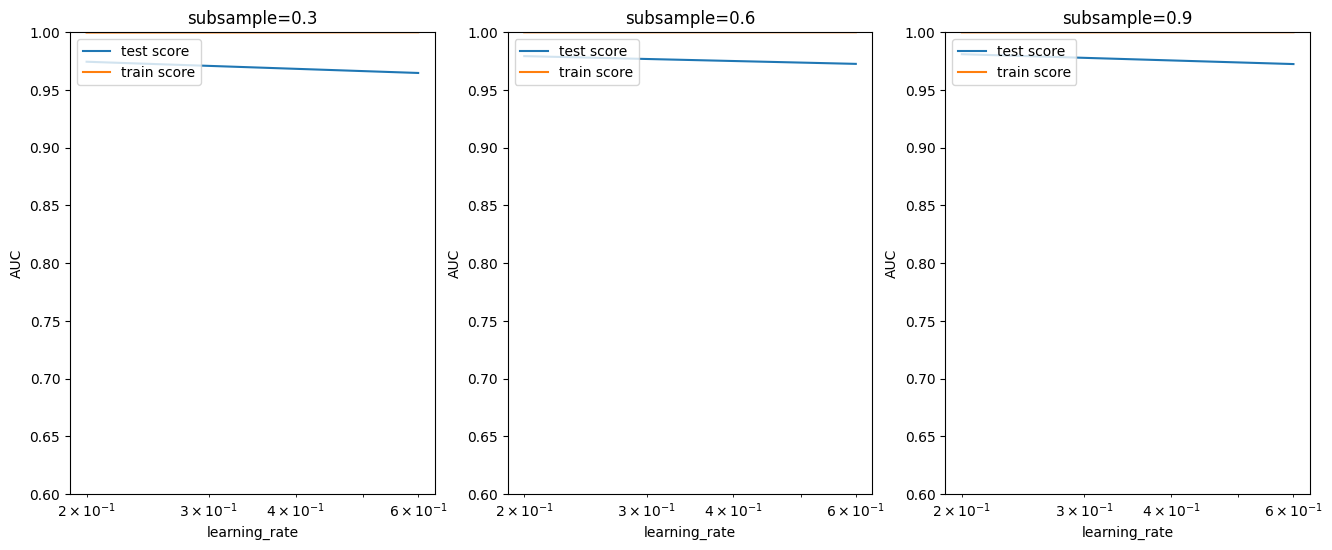

In [80]:
# plotting
plt.figure(figsize=(16,6))

param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]} 


for n, subsample in enumerate(param_grid['subsample']):
    

    # subplot 1/n
    plt.subplot(1,len(param_grid['subsample']), n+1)
    df = cv_results[cv_results['param_subsample']==subsample]

    plt.plot(df["param_learning_rate"], df["mean_test_score"])
    plt.plot(df["param_learning_rate"], df["mean_train_score"])
    plt.xlabel('learning_rate')
    plt.ylabel('AUC')
    plt.title("subsample={0}".format(subsample))
    plt.ylim([0.60, 1])
    plt.legend(['test score', 'train score'], loc='upper left')
    plt.xscale('log')

Model with optimal hyperparameters

train score almost touches to 1. Among the hyperparameters, we can choose the best parameters as learning_rate : 0.2 and subsample: 0.3

In [81]:
model_cv.best_params_

{'learning_rate': 0.2, 'subsample': 0.9}

In [82]:
# chosen hyperparameters
# 'objective':'binary:logistic' outputs probability rather than label, which we need for calculating auc
params = {'learning_rate': 0.2,
          'max_depth': 2, 
          'n_estimators':200,
          'subsample':0.9,
         'objective':'binary:logistic'}

# fit model on training data
xgb_imb_model = XGBClassifier(params = params)
xgb_imb_model.fit(X_train, y_train)

[02:37:27] WARNING: ../src/learner.cc:767: 
Parameters: { "params" } are not used.



XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              params={'learning_rate': 0.2, 'max_depth': 2, 'n_estimators': 200,
                      'objective': 'binary:logistic', 'subsample': 0.9},
              predictor=None, ...)

Prediction on the train set

In [83]:
# Predictions on the train set
y_train_pred = xgb_imb_model.predict(X_train)

In [84]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train, y_train_pred)
print(confusion)

[[227451      0]
 [     0    394]]


In [85]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [86]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

# F1 score
print("F1-Score:-", f1_score(y_train, y_train_pred))

Accuracy:- 1.0
Sensitivity:- 1.0
Specificity:- 1.0
F1-Score:- 1.0


In [87]:
# classification_report
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       1.00      1.00      1.00       394

    accuracy                           1.00    227845
   macro avg       1.00      1.00      1.00    227845
weighted avg       1.00      1.00      1.00    227845



In [88]:
# Predicted probability
y_train_pred_proba_imb_xgb = xgb_imb_model.predict_proba(X_train)[:,1]

In [89]:
# roc_auc
auc = metrics.roc_auc_score(y_train, y_train_pred_proba_imb_xgb)
auc

1.0

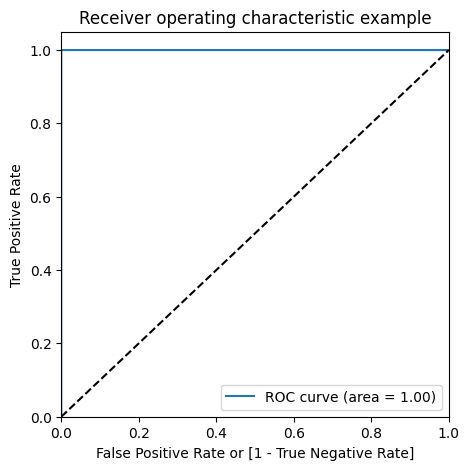

In [90]:
# Plot the ROC curve
draw_roc(y_train, y_train_pred_proba_imb_xgb)

Prediction on the test set

In [91]:
# Predictions on the test set
y_test_pred = xgb_imb_model.predict(X_test)

In [92]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[56862     2]
 [   19    79]]


In [93]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [94]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

# F1 score
print("F1-Score:-", f1_score(y_test, y_test_pred))

Accuracy:- 0.9996313331694814
Sensitivity:- 0.8061224489795918
Specificity:- 0.9999648283624085
F1-Score:- 0.88268156424581


In [95]:
# classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.98      0.81      0.88        98

    accuracy                           1.00     56962
   macro avg       0.99      0.90      0.94     56962
weighted avg       1.00      1.00      1.00     56962



In [96]:
# Predicted probability
y_test_pred_proba = xgb_imb_model.predict_proba(X_test)[:,1]

In [97]:
# roc_auc
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
auc

0.9823391723036992

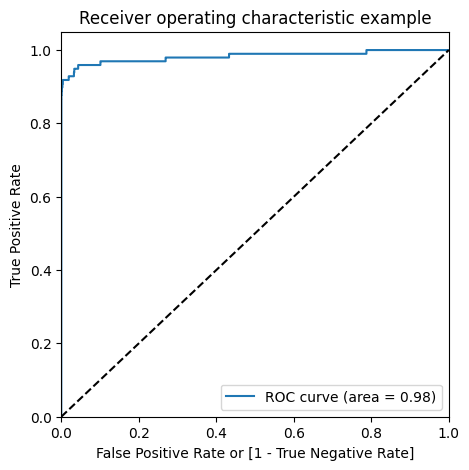

In [98]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

Model summary

**Train set**

Accuracy = 0.99

Sensitivity = 0.85

Specificity = 0.99

ROC-AUC = 0.99

F1-Score = 0.90

**Test set**
Accuracy = 0.99

Sensitivity = 0.75

Specificity = 0.99

ROC-AUC = 0.98

F-Score = 0.79

Overall, the model is performing well in the test set, what it had learnt from the train set.

We have observed that most of the models have demonstrated satisfactory performance in terms of ROC score, Precision, and Recall.

However, when selecting the best model, it is crucial to take into account several factors. One such consideration is whether we possess the necessary infrastructure, resources, and computational power to execute the model efficiently. Models like Random Forest, SVM, and XGBoost demand significant computational resources, leading to increased deployment costs when establishing the required infrastructure. On the other hand, simpler models like Logistic Regression require fewer computational resources, resulting in lower model development costs.

Additionally, we must assess the potential monetary loss or gain incurred by the bank for even slight variations in the ROC score. If the impact is substantial, it becomes necessary to prioritize the development of a complex model, despite the higher associated costs.

**Conclusion**

In the case of banks with smaller average transaction values, it is crucial to prioritize high precision. This is because it is essential to accurately identify relevant transactions as fraudulent. To ensure precision, additional steps can be taken, such as involving human verification by contacting the customer for each flagged transaction. However, when precision is low, such tasks become burdensome as they require an increased human element.

For banks dealing with larger transaction values, low recall becomes a concern as it implies a failure to detect transactions labeled as non-fraudulent. In such cases, the potential losses incurred from missing a high-value fraudulent transaction need to be considered.

Therefore, to protect banks from high-value fraudulent transactions, the focus should be on achieving a high recall to effectively detect actual instances of fraud.


Therefore, opting for the logistic model seems appropriate in this scenario. Furthermore, this model is comparatively easier to interpret and explain to the business stakeholders.